<a href="https://colab.research.google.com/github/PWaweru88/PWaweru88-Projects/blob/master/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('dummy_bank_data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 24.4+ KB


In [ ]:
#stats summary
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [ ]:
#Data size
df.shape

(367, 12)

In [ ]:
#check for null values
df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [ ]:
#Fill Null Values In 'LoanAmount' with column mean 
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [ ]:
#Fill Null Values In 'Credit_History' with column mean
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      6
Credit_History        0
Property_Area         0
dtype: int64

In [ ]:
#Drop The Rest Of The Null Values
df.dropna(inplace=True)

In [ ]:
#Confirm that there are no null values
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [ ]:
#new data size
df.shape

(318, 12)

# <u>Exploratory Data Analysis </u>

<font color =  #fbf703>
(Dependent Variable = Credit History)

Key (Credit History): 0 = No, 1 = Yes

1. Gender Vs Credit History

Credit_History  0.0  1.0
Gender                  
Female           12   53
Male             35  218


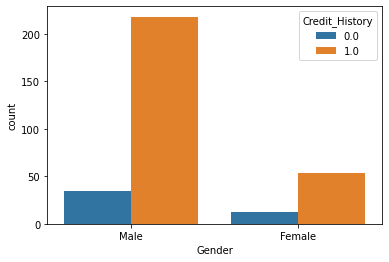

In [ ]:
sns.countplot(df['Gender'], hue=df['Credit_History'])
print(pd.crosstab(df['Gender'], df['Credit_History']))

- Conclusion : Less risky to offer loans to Female applicants

2. Marital Status Vs Credit History

Credit_History  0.0  1.0
Married                 
No               21   93
Yes              26  178


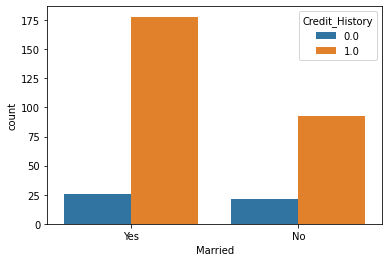

In [ ]:
sns.countplot(df['Married'], hue=df['Credit_History'])
print(pd.crosstab(df['Married'], df['Credit_History']))

- Conclusion : Less risky to offer loans to single applicants

3. Education Vs Credit History

Credit_History  0.0  1.0
Education               
Graduate         34  213
Not Graduate     13   58


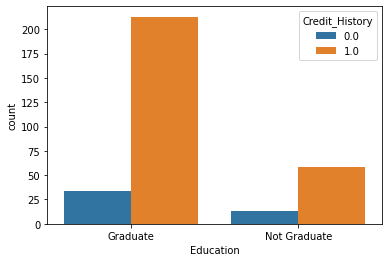

In [ ]:
sns.countplot(df['Education'], hue=df['Credit_History'])
print(pd.crosstab(df['Education'], df['Credit_History']))

- Conclusion : Less risky to offer loans to Non-graduate applicants

4. Self Employed Status Vs Credit History

Credit_History  0.0  1.0
Self_Employed           
No               45  239
Yes               2   32


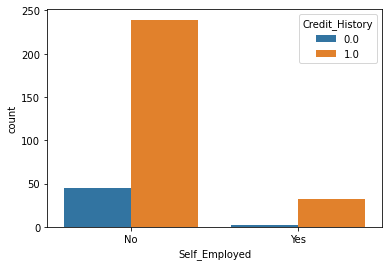

In [ ]:
sns.countplot(df['Self_Employed'], hue=df['Credit_History'])
print(pd.crosstab(df['Self_Employed'], df['Credit_History']))

- Conclusion : Less risky to offer loans to Self Employed applicants

5. Self Employed Status Vs Education

Education      Graduate  Not Graduate
Self_Employed                        
No                  220            64
Yes                  27             7


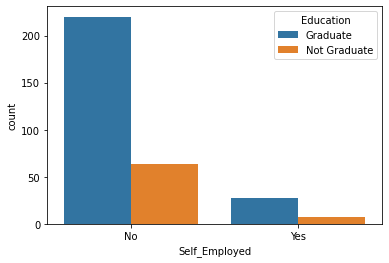

In [ ]:
sns.countplot(df['Self_Employed'], hue=df['Education'])
print(pd.crosstab(df['Self_Employed'], df['Education']))

6. Property Area Vs Credit History

Credit_History  0.0  1.0
Property_Area           
Rural            16   81
Semiurban        16   83
Urban            15  107


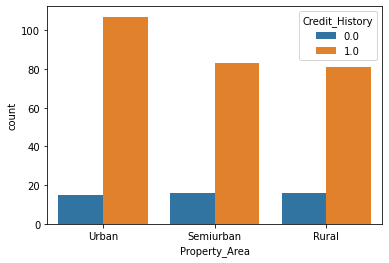

In [ ]:
sns.countplot(df['Property_Area'], hue=df['Credit_History'])
print(pd.crosstab(df['Property_Area'], df['Credit_History']))

- Conclusion : Applicants from Urban Areas Have Highest and Lowest Credit History

In [ ]:
#Credit History Value Conversion

df['Credit_History'].replace('Y', 1.0, inplace=True)
df['Credit_History'].replace('N', 0.0, inplace=True)

In [ ]:
#Credit History Count

df['Credit_History'].value_counts()

1.0    271
0.0     47
Name: Credit_History, dtype: int64

In [ ]:
#Gender Value Conversion And Count

df.Gender=df.Gender.map({'Male':1, 'Female':0})
df['Gender'].value_counts()

1    253
0     65
Name: Gender, dtype: int64

In [ ]:
#Marital Status Conversion And Count

df.Married=df.Married.map({'Yes':1, 'No':0})
df['Married'].value_counts()

1    204
0    114
Name: Married, dtype: int64

In [ ]:
#Dependants Conversion And Counts

df.Dependents=df.Dependents.map({'0':0, '1':1, '2':2, '3+':3})
df['Dependents'].value_counts()

0    183
2     54
1     46
3     35
Name: Dependents, dtype: int64

In [ ]:
#Education Status And Counts

df.Education=df.Education.map({'Graduate':1, 'Not Graduate':0})
df['Education'].value_counts()

1    247
0     71
Name: Education, dtype: int64

7. Correlation Matrix

Text(0.5, 1.0, 'Correlation Matrix (for Loan Status)')

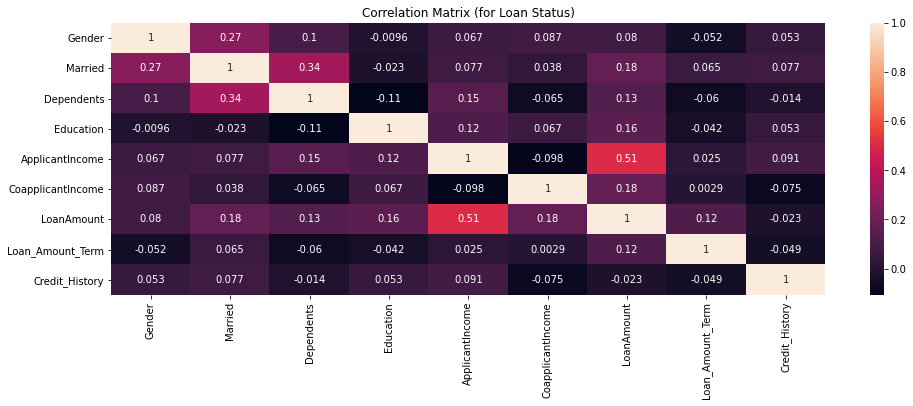

In [ ]:
plt.figure(figsize=(16,5))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Matrix (for Loan Status)')

In [ ]:
df.head()

In [ ]:
df.info()

## <u>Deploying Predictive Models</u>

1. Check Data types

In [ ]:
df.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

2. Convert Non-Numeric Dtypes to Numeric Dtypes (One-Hot Encoding)

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

#Loan_ID col
df.iloc[:, 0] = labelencoder.fit_transform(df.iloc[:, 0].values)

#Self_Employed col
df.iloc[:, 5] = labelencoder.fit_transform(df.iloc[:, 5].values)

#property_Area col
df.iloc[:, 11] = labelencoder.fit_transform(df.iloc[:, 11].values)

In [ ]:
#confirm that all dtypes are numeric

df.dtypes

Loan_ID                int32
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
dtype: object

3. Split data into independent (x) and dependent variables (y) and 30% Testing

In [ ]:
x =df.iloc[:, 1:8].values
y =df.iloc[:, 0].values

In [ ]:
#split dataset into 70% train and 30% testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state=0)

4. Scale Data

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

5. Apply Models

In [ ]:
def models(x_train, y_train):
    #logistic regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=0)
    log.fit(x_train, y_train)
    
    #knn
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors= 5, metric = 'minkowski', p=2)
    knn.fit(x_train, y_train)
    
    #svc (linear kernel)
    from sklearn.svm import SVC
    svc_lin = SVC(kernel='linear', random_state=0)
    svc_lin.fit(x_train, y_train)
    
    #svc (RBF kernel)
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel='rbf', random_state=0)
    svc_rbf.fit(x_train, y_train)
    
    #decision tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
    tree.fit(x_train, y_train)
    
    print('[0]Logistic Regression Accuracy: ', log.score(x_train, y_train))
    print('[1]K-Nearest Neighbors Accuracy: ', knn.score(x_train, y_train))
    print('[2]SVC(Linear) Accuracy: ', svc_lin.score(x_train, y_train))
    print('[3]SVC (RBF) Accuracy: ', svc_rbf.score(x_train, y_train))
    print('[4]Decision Tree Accuracy: ', tree.score(x_train, y_train))
        
    return log, knn, svc_lin, svc_rbf, tree

6. Call models and Return Accuracy Score

In [ ]:
model = models(x_train, y_train)

[0]Logistic Regression Accuracy:  0.35585585585585583
[1]K-Nearest Neighbors Accuracy:  0.21171171171171171
[2]SVC(Linear) Accuracy:  0.9954954954954955
[3]SVC (RBF) Accuracy:  0.9954954954954955
[4]Decision Tree Accuracy:  0.9954954954954955


<u>Conclusion: </u>
- Strongest Model = Decision Tree (99.5%)
- Weakest Model = K- Nearest Neighbors (21.2%)